<a href="https://colab.research.google.com/github/Oubihi1/Convertisseur-de-temp-rature/blob/main/Home_exchange_Subscriptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-cloud-bigquery

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import bigquery
import pandas as pd
# Initialize a BigQuery client
client = bigquery.Client(project='mywagon-445720')

# Define your query
query = """
SELECT *
FROM `home_exchange.subscriptions`
"""
# # Execute the query and store results in a pandas DataFrame
query_job = client.query(query)
#  # API request
df_sub= query_job.to_dataframe()

In [ ]:
subscription_counts = df_sub.groupby('user_id').size().reset_index(name='subscriptions_count')
subscription_counts


,user_id,subscriptions_count
0,1,1
1,9,2
2,10,1
3,40,1
4,67,1
...,...,...
70721,3855144,2
70722,3855153,1
70723,3855180,1
70724,3855387,1


# **Data Cleaning**

In [ ]:
# Convert date columns to datetime datatype
df_sub["first_subscription_date"] = pd.to_datetime(df_sub["first_subscription_date"], format="%Y-%m-%d", errors ="coerce")
df_sub["subscription_date"] = pd.to_datetime(df_sub["subscription_date"], format="%Y-%m-%d", errors ="coerce")

# removing all 298 duplicated rows
df_sub.drop_duplicates(subset=['subscription_date', 'user_id'] , inplace=True)

In [ ]:
# Sort by the subscription_date and reset the index
df_sub.sort_values( by=['subscription_date'], ascending=True ,inplace=True )
df_sub.reset_index(drop= True, inplace=False)

,subscription_date,user_id,renew,first_subscription_date,first_subscription,referral,promotion,payment3x,payment2,payment3,country,region,department,city
0,2019-01-01,3000004,0,2019-01-01,1,0,0,0,0,0,FRA,Provence-Alpes-Côte D'azur,Vaucluse,Avignon
1,2019-01-01,2801438,1,2018-01-01,0,0,0,0,0,0,BEL,Vlaanderen,West-Vlaanderen,Brugge
2,2019-01-01,2482896,1,2015-04-26,0,0,0,0,0,0,NZL,Waikato,None,Cambridge
3,2019-01-01,2795622,0,2018-01-01,0,0,0,0,0,0,NLD,Utrecht,Wijk Bij Duurstede,Langbroek
4,2019-01-01,2168605,1,2017-01-21,0,0,0,0,0,0,NLD,Noord-Holland,Amsterdam,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99697,2021-10-31,3364469,1,2020-01-19,0,0,0,0,0,0,PRT,Lisbonne,Lisbonne,None
99698,2021-10-31,1166698,1,2006-10-13,0,0,0,0,0,0,USA,Kentucky,None,None
99699,2021-10-31,2984771,0,2018-10-31,0,0,0,0,0,0,USA,Illinois,Lake County,Lake Bluff
99700,2021-10-31,370525,0,2019-10-24,0,0,0,0,0,0,FRA,Auvergne Rhône-Alpes,Puy-De-Dôme,Vic-Le-Comte


In [ ]:
df_sub.isnull().sum()

,0
subscription_date,0
user_id,0
renew,0
first_subscription_date,0
first_subscription,0
referral,0
promotion,0
payment3x,0
payment2,0
payment3,0


In [ ]:
#change user_id to object from int64
df_sub["user_id"] = df_sub["user_id"].astype(object)


In [ ]:
print(df_sub.dtypes)

subscription_date          datetime64[ns]
user_id                            object
renew                               Int64
first_subscription_date    datetime64[ns]
first_subscription                  Int64
referral                            Int64
promotion                           Int64
payment3x                           Int64
payment2                            Int64
payment3                            Int64
country                            object
region                             object
department                         object
city                               object
dtype: object


**Visualisation**

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

Create a graph(circle) that combines the columns (country) based on user_id. Include the top 5 entries and group the rest under the label "Other" to represent the world.

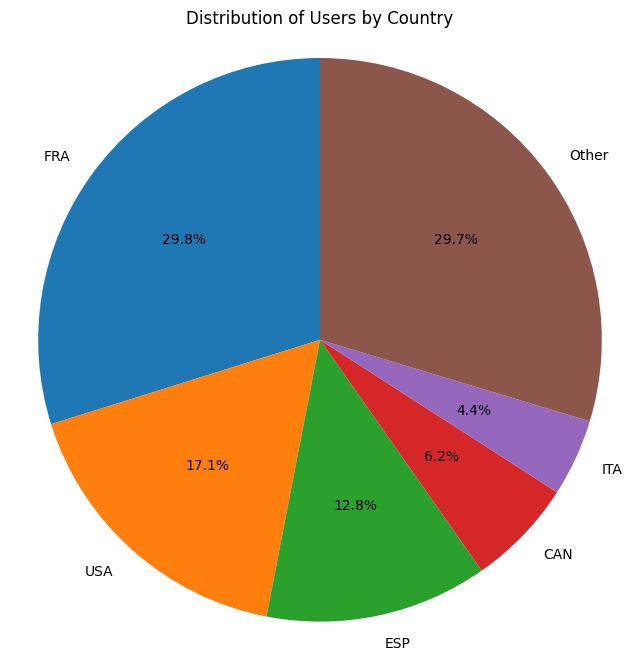

In [50]:
# prompt: Create a graph(circle) that combines the columns (country) based on user_id. Include the top 5 entries and group the rest under the label "Other" to represent the world.

import matplotlib.pyplot as plt
import pandas as pd # Make sure pandas is imported

# Count occurrences of each country for each user
country_counts = df_sub.groupby('user_id')['country'].value_counts().unstack(fill_value=0)

# Sum the country counts across all users
total_country_counts = country_counts.sum()

# Get the top 5 countries
top_5_countries = total_country_counts.nlargest(5).index

# Group the remaining countries under "Other"
other_countries_count = total_country_counts.drop(top_5_countries).sum()

# Create a new Series with the top 5 countries and "Other"
# Instead of append, use pd.concat to combine the Series
country_data = pd.concat([total_country_counts[top_5_countries], pd.Series({'Other': other_countries_count})])


# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(country_data, labels=country_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Users by Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Create a graph that combines first_subscription by first_subscription_date (year)

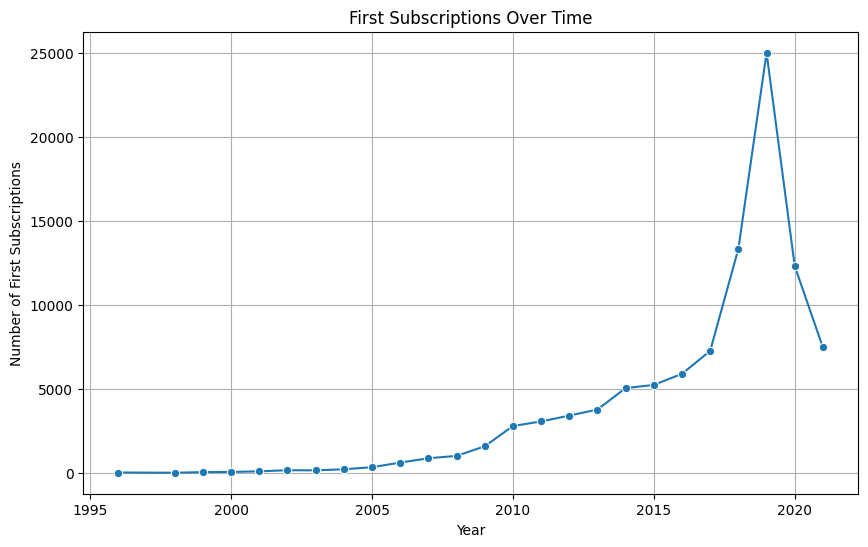

In [46]:
# prompt: Create a graph that combines first_subscription by first_subscription_date (year)

# Extract the year from the first_subscription_date
df_sub['first_subscription_year'] = df_sub['first_subscription_date'].dt.year

# Group by year and count the number of first subscriptions
yearly_subscriptions = df_sub.groupby('first_subscription_year')['first_subscription_date'].count().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='first_subscription_year', y='first_subscription_date', data=yearly_subscriptions, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of First Subscriptions')
plt.title('First Subscriptions Over Time')
plt.grid(True)
plt.show()

Create a graph that combines all these columns(renew,first_subscription,referral,promotion,payment3x,payment2,payment3)based on first_subscription_date, grouped by year for comparison.

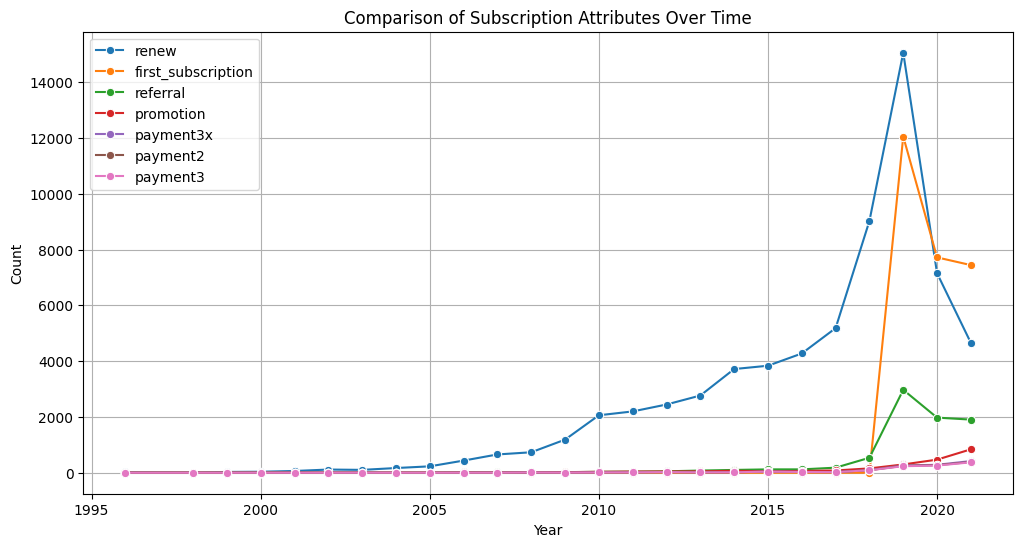

In [47]:
# prompt: Create a graph that combines all these columns(renew,first_subscription,referral,promotion,payment3x,payment2,payment3)based on first_subscription_date, grouped by year for comparison.

# Group by year and sum the relevant columns
yearly_data = df_sub.groupby('first_subscription_year').agg({
    'renew': 'sum',
    'first_subscription': 'sum',
    'referral': 'sum',
    'promotion': 'sum',
    'payment3x': 'sum',
    'payment2': 'sum',
    'payment3': 'sum'
}).reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
for column in ['renew', 'first_subscription', 'referral', 'promotion', 'payment3x', 'payment2', 'payment3']:
    sns.lineplot(x='first_subscription_year', y=column, data=yearly_data, label=column, marker='o')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Comparison of Subscription Attributes Over Time')
plt.grid(True)
plt.legend()
plt.show()

Create a graph that combines all these columns(renew,first_subscription,referral,promotion,payment3x,payment2,payment3)based on subscription date, grouped by year for comparison.

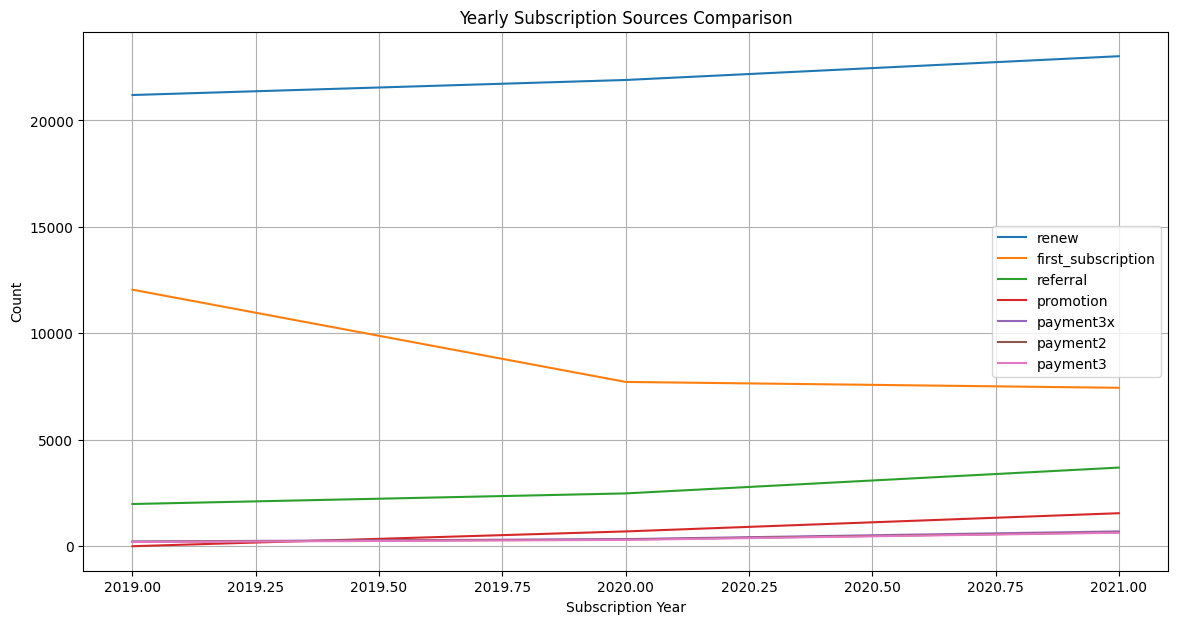

In [45]:
# prompt: Create a graph that combines all these columns(renew,first_subscription,referral,promotion,payment3x,payment2,payment3)based on subscription date, grouped by year for comparison.

# Group data by year and subscription source
df_sub['subscription_year'] = df_sub['subscription_date'].dt.year
source_columns = ['renew', 'first_subscription', 'referral', 'promotion', 'payment3x', 'payment2', 'payment3']
yearly_sources = df_sub.groupby('subscription_year')[source_columns].sum().reset_index()

# Create the plot
plt.figure(figsize=(14, 7))
for col in source_columns:
    sns.lineplot(x='subscription_year', y=col, data=yearly_sources, label=col)

plt.title('Yearly Subscription Sources Comparison')
plt.xlabel('Subscription Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

Graph for subscription date by years and the count of user IDs.

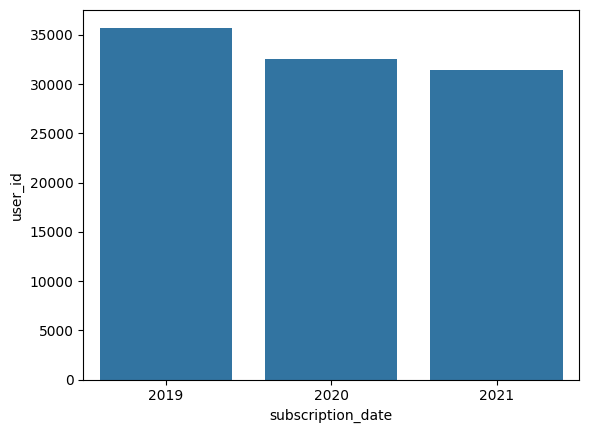

In [31]:

graph_sup_by_year = df_sub.groupby(df_sub['subscription_date'].dt.year)['user_id'].count().reset_index()
praph_sup_by_year = sns.barplot(x='subscription_date', y='user_id', data=graph_sup_by_year)
show = plt.show()

first_subscription by year and count user_id graph

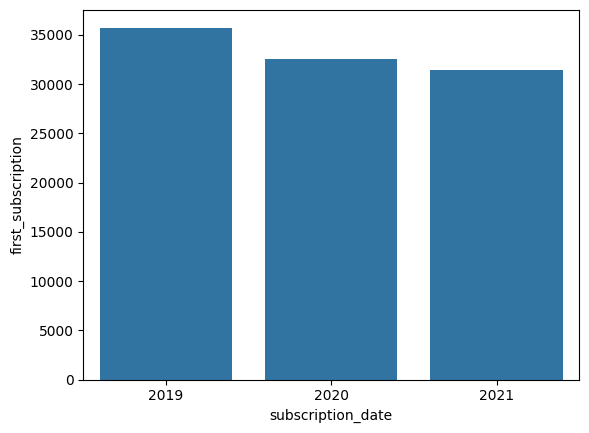

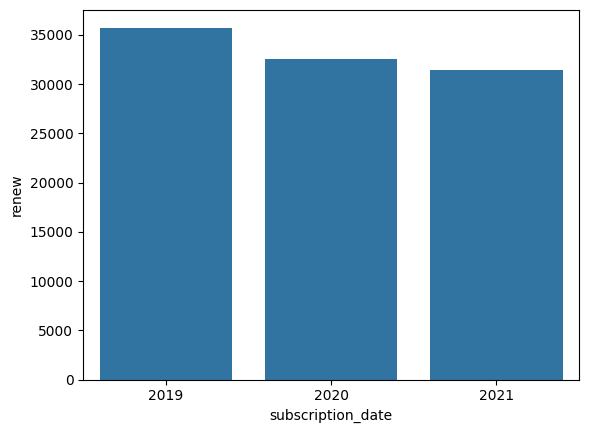

In [38]:
graph_sup_by_year = df_sub.groupby(df_sub['subscription_date'].dt.year)['first_subscription'].count().reset_index()
praph_sup_by_year = sns.barplot(x='subscription_date', y='first_subscription', data=graph_sup_by_year)
show = plt.show()

graph_sup_by_year = df_sub.groupby(df_sub['subscription_date'].dt.year)['renew'].count().reset_index()
praph_sup_by_year = sns.barplot(x='subscription_date', y='renew', data=graph_sup_by_year)
show = plt.show()

Graph for renew by years and the count of user IDs.

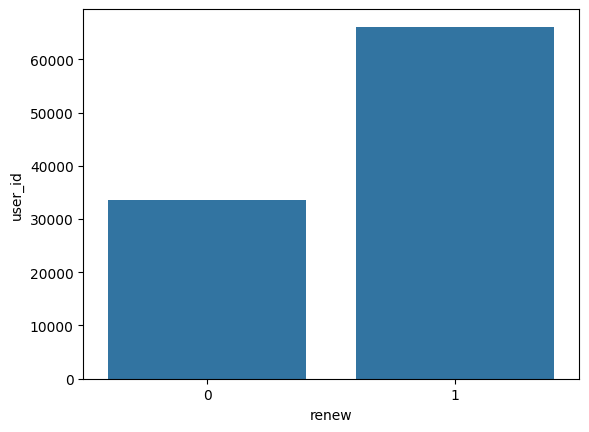

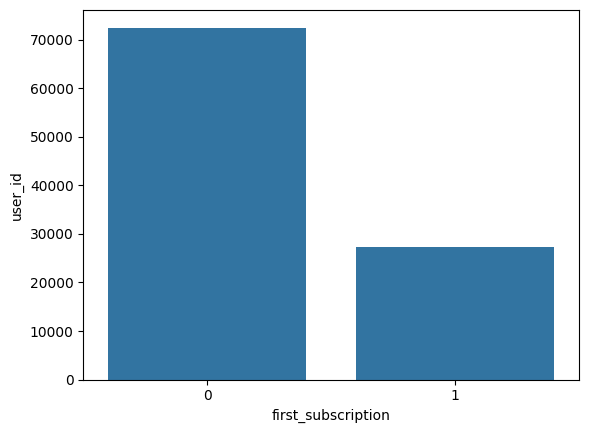

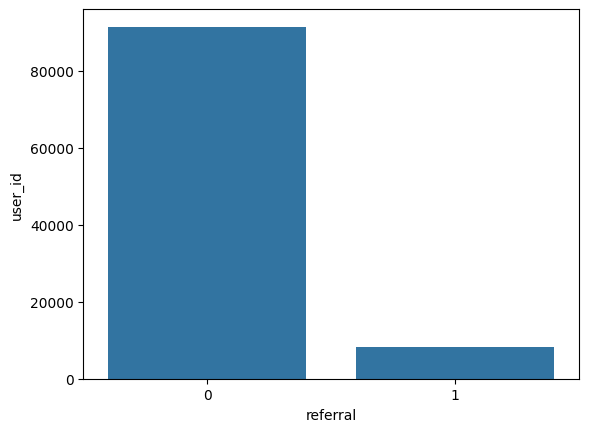

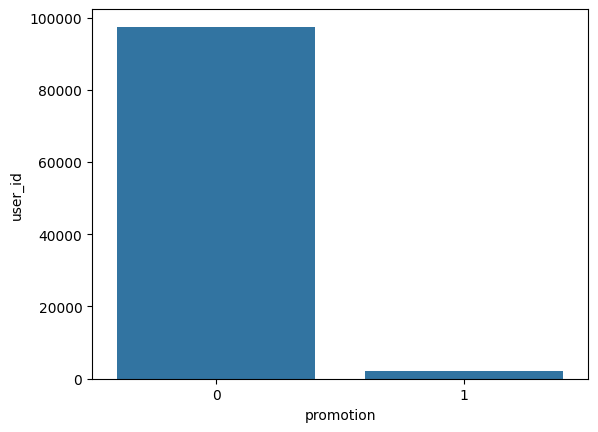

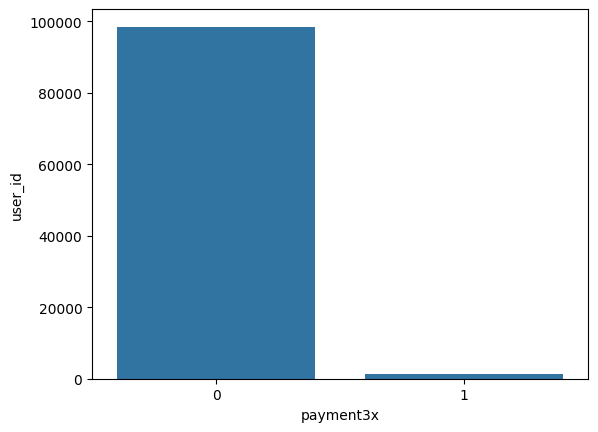

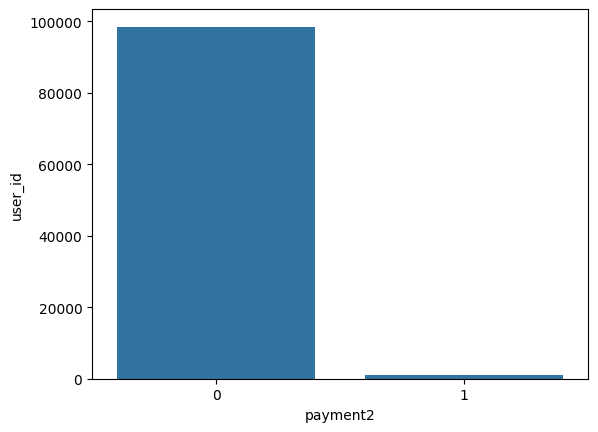

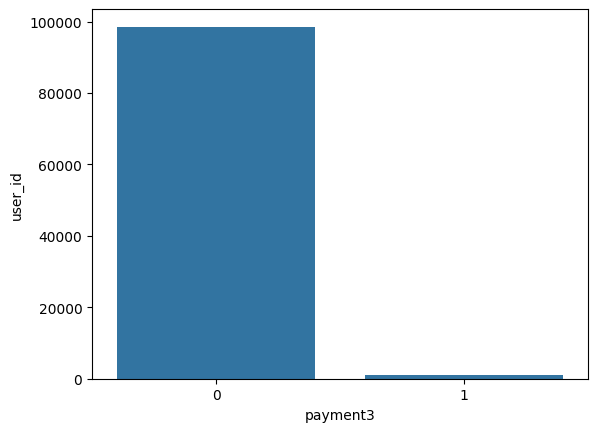

In [36]:
graph_first_sub_by_user = df_sub.groupby(df_sub['renew'])['user_id'].count().reset_index()
graph_first_sub_by_user = sns.barplot(x='renew', y='user_id', data=graph_first_sub_by_user)
show = plt.show()

graph_first_sub_by_user = df_sub.groupby(df_sub['first_subscription'])['user_id'].count().reset_index()
graph_first_sub_by_user = sns.barplot(x='first_subscription', y='user_id', data=graph_first_sub_by_user)
show = plt.show()

graph_first_sub_by_user = df_sub.groupby(df_sub['referral'])['user_id'].count().reset_index()
graph_first_sub_by_user = sns.barplot(x='referral', y='user_id', data=graph_first_sub_by_user)
show = plt.show()

graph_first_sub_by_user = df_sub.groupby(df_sub['promotion'])['user_id'].count().reset_index()
graph_first_sub_by_user = sns.barplot(x='promotion', y='user_id', data=graph_first_sub_by_user)
show = plt.show()

graph_first_sub_by_user = df_sub.groupby(df_sub['payment3x'])['user_id'].count().reset_index()
graph_first_sub_by_user = sns.barplot(x='payment3x', y='user_id', data=graph_first_sub_by_user)
show = plt.show()

graph_first_sub_by_user = df_sub.groupby(df_sub['payment2'])['user_id'].count().reset_index()
graph_first_sub_by_user = sns.barplot(x='payment2', y='user_id', data=graph_first_sub_by_user)
show = plt.show()

graph_first_sub_by_user = df_sub.groupby(df_sub['payment3'])['user_id'].count().reset_index()
graph_first_sub_by_user = sns.barplot(x='payment3', y='user_id', data=graph_first_sub_by_user)
show = plt.show()
